In [8]:
from keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# load the data 
num = 60000
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train[0:num].astype('float32') / 255, x_test.astype('float32') / 255

y_train = np_utils.to_categorical(y_train[0:num], 10)
y_test = np_utils.to_categorical(y_test, 10)

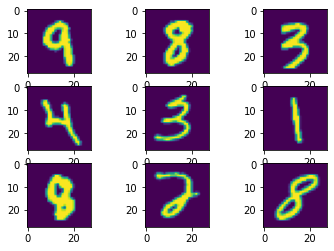

In [4]:
# show the image randomly
for id in range(9):
    plt.subplot(3, 3, id + 1)
    plt.imshow(x_train[np.random.randint(0, 5000)])

In [5]:
# build the model
model = tf.keras.models.Sequential(name = 'CNN')

# input layer
model.add(Input((28, 28, 1)))

#convolution layer
model.add(Conv2D(filters = 64, strides = (1, 1), kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 32, strides = (1, 1), kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 16, strides = (1, 1), kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

#flatten layer
model.add(Flatten())

# nn layer
model.add(Dense(16, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2()))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0       

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
750/750 [==============================] - 57s 75ms/step - loss: 0.6964 - accuracy: 0.7669 - val_loss: 0.2013 - val_accuracy: 0.9388
Epoch 2/10
750/750 [==============================] - 47s 63ms/step - loss: 0.2537 - accuracy: 0.9241 - val_loss: 0.1358 - val_accuracy: 0.9585
Epoch 3/10
750/750 [==============================] - 38s 51ms/step - loss: 0.1832 - accuracy: 0.9458 - val_loss: 0.1252 - val_accuracy: 0.9610
Epoch 4/10
750/750 [==============================] - 39s 52ms/step - loss: 0.1513 - accuracy: 0.9556 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 5/10
750/750 [==============================] - 39s 52ms/step - loss: 0.1252 - accuracy: 0.9637 - val_loss: 0.0929 - val_accuracy: 0.9726
Epoch 6/10
750/750 [==============================] - 39s 52ms/step - loss: 0.1115 - accuracy: 0.9674 - val_loss: 0.0824 - val_accuracy: 0.9772
Epoch 7/10
750/750 [==============================] - 39s 52ms/step - loss: 0.0999 - accuracy: 0.9712 - val_loss: 0.0792 - val_accuracy:

<AxesSubplot:>

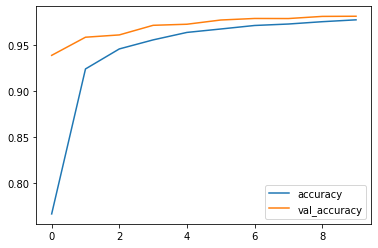

In [21]:
# del history.history['loss']
# del history.history['val_loss']
pd.DataFrame(history.history).plot()

In [29]:
y_pred = model.predict(x_test)

result = model.evaluate(x_test, y_test)
print('accuracy of this CNN model is', result[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0644 - accuracy: 0.9814
accuracy of this CNN model is 0.9814000129699707
